In [3]:
import os
import sys
import re
from matplotlib import pyplot as plt
from coffea.util import load
from omegaconf import OmegaConf

from pocket_coffea.utils.plot_utils import PlotManager


In [4]:
# input_dir="/work/mmalucch/out_hh4b/out_JMENanoData_comparison_all_variables/"
input_dir="/work/mmalucch/out_hh4b/out_test_common_dataweights/"
input_dir="/work/mmalucch/out_hh4b/out_JMENanoData_comparison_all_variables/"
only_cat=None
workers=8
log=False
density=True
verbose=1
index_file=None
year="2022_postEE"

In [19]:
# Using the `input_dir` argument, read the default config and coffea files (if not set with argparse):
cfg = os.path.join(input_dir, "parameters_dump.yaml")
inputfile = os.path.join(input_dir, "output_all.coffea")
outputdir = os.path.join(input_dir, "plots")

# Load yaml file with OmegaConf
if cfg[-5:] == ".yaml":
    parameters_dump = OmegaConf.load(cfg)
else:
    raise Exception("The input file format is not valid. The config file should be a in .yaml format.")

parameters = parameters_dump

# Resolving the OmegaConf
try:
    OmegaConf.resolve(parameters)
except Exception as e:
    print("Error during resolution of OmegaConf parameters magic, please check your parameters files.")
    raise(e)

style_cfg = parameters['plotting_style']

if os.path.isfile( inputfile ): accumulator = load(inputfile)
else: sys.exit(f"Input file '{inputfile}' does not exist")


if not os.path.exists(outputdir):
    os.makedirs(outputdir)

variables = accumulator['variables'].keys()

# if exclude_hist:
#     variables_to_exclude = [s for s in variables if any([re.search(p, s) for p in exclude_hist])]
#     variables = [s for s in variables if s not in variables_to_exclude]
# if only_hist:
#     variables = [s for s in variables if any([re.search(p, s) for p in only_hist])]
hist_objs = { v : accumulator['variables'][v] for v in variables }


In [20]:
# print(accumulator['variables'])


sample=list(accumulator["columns"].keys())[0]
dataset=list(accumulator["columns"][sample].keys())[0]
category=list(accumulator["columns"][sample][dataset].keys())[1]
print(sample,dataset, category)
col=accumulator["columns"][sample][dataset][category]
for k in col.keys():
    print(k)
    col[k]=col[k].value#[col[k].value!=-999]

print(col['events_bkg_morphing_dnn_weight'])
print(col['weight'])

DATA_JetMET_JMENano_skimmed DATA_JetMET_JMENano_2022_postEE_EraE 2b_region
weight
HiggsLeading_pt
HiggsLeading_mass
HiggsLeading_dR
HiggsSubLeading_pt
HiggsSubLeading_mass
HiggsSubLeading_dR
HH_mass
events_dR_min
events_dR_max
events_bkg_morphing_dnn_weight
[0.42789093 0.54197884 0.25339168 ... 3.0775018  0.65086865 0.37368652]
[0.42789093 0.54197884 0.25339168 ... 3.07750177 0.65086865 0.37368652]


[2.08469500e+06 2.22797375e+06 1.19797390e+07 2.21871067e+20
 8.83589600e+07 2.77463270e+09]


/tmp/ipykernel_3156/1541932704.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


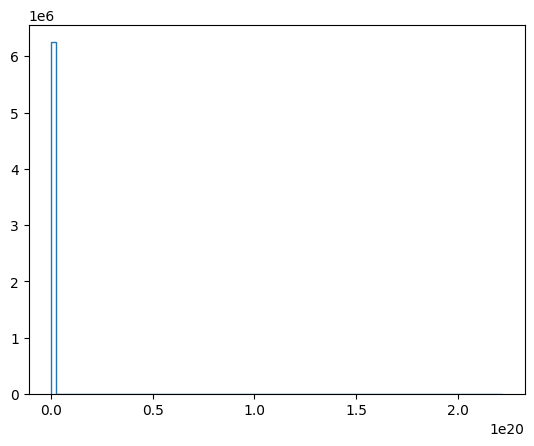

In [31]:
# plot histo of the weights
fig, ax = plt.subplots()
ax.hist(col['weight'], bins=100, histtype='step', label='weight')
fig.show()


In [34]:
mask_w=col['weight']>10e+10
for c in col.keys():
    print(c)
    print(col[c][mask_w])


weight
[2.21871067e+20]
HiggsLeading_pt
[543.7534]
HiggsLeading_mass
[6802.146]
HiggsLeading_dR
[4.747139]
HiggsSubLeading_pt
[476.80316]
HiggsSubLeading_mass
[1500.0573]
HiggsSubLeading_dR
[3.0981348]
HH_mass
[8472.742]
events_dR_min
[2.40309095]
events_dR_max
[4.74713898]
events_bkg_morphing_dnn_weight
[2.2187107e+20]


In [21]:
norm_factor=accumulator["cutflow"]["4b_region"]["DATA_JetMET_JMENano_2022_postEE_EraE"]["DATA_JetMET_JMENano_skimmed"]/accumulator["cutflow"]["2b_region"]["DATA_JetMET_JMENano_2022_postEE_EraE"]["DATA_JetMET_JMENano_skimmed"]
print(f"Normalization factor: {norm_factor}")

Normalization factor: 0.02174632582022647


Plotting JetGoodFromHiggsOrdered_eta_1 for 4b_region
Plotting JetGoodFromHiggsOrdered_eta_1 for 2b_region
Plotting JetGoodFromHiggsOrdered_eta_1 for 2b_region_noWeights


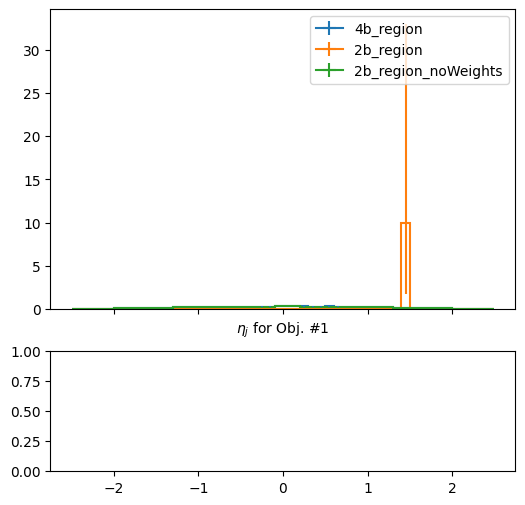

In [25]:
plotter = PlotManager(
        variables=variables,
        hist_objs=hist_objs,
        datasets_metadata=accumulator['datasets_metadata'],
        plot_dir=outputdir,
        style_cfg=style_cfg,
        only_cat=only_cat,
        only_year=year,
        workers=workers,
        log=log,
        density=density,
        verbose=verbose,
        save=False,
        index_file=index_file
    )

for var in variables:
    fig, (ax, ax_ratio) = plt.subplots(2,1,figsize=[6,6],sharex=True, gridspec_kw={"height_ratios": [2.5, 1]})
    for i, cat in enumerate(["4b_region", "2b_region", "2b_region_noWeights"]):
        shape = plotter.shape_objects[f"{var}_{year}"]
        # stacks = shape._get_stacks(cat)
        # shape.syst_manager.update(cat, stacks)
        print(f"Plotting {var} for {cat}")
        sample = "DATA_JetMET_JMENano_skimmed"
        h = shape.h_dict[sample][{'cat':cat}].plot(ax=ax, label=cat, density=density)
    h
    ax.legend()
    break